In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Data loading and exploration
data = pd.read_csv('owid-covid-data.csv')
#print(data)

# Checks column names
#print(data.columns)

# Show the first 5 rows
#print(data.head())

# Identify missing values in each column
missing_values = data.isnull().sum()
print(missing_values)

iso_code                                        0
continent                                   16665
location                                        0
date                                            0
total_cases                                 37997
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       337901
excess_mortality_cumulative                337901
excess_mortality                           337901
excess_mortality_cumulative_per_million    337901
Length: 67, dtype: int64


In [10]:
# Data cleaning

# Filter for Algeria, American Samoa & Andorra
countries_of_interest = ['Algeria', 'American Samoa', 'Andorra']
filtered_data = data[data['location'].isin(countries_of_interest)]

print(filtered_data)

# Drop rows where 'date', 'total_cases', 'new_cases' column has missing values
filtered_data_cleaned = filtered_data.dropna(subset=['date', 'total_cases', 'new_cases']).copy()

print(filtered_data_cleaned.head())

# Convert the 'date' column to datetime format
filtered_data_cleaned['date'] = pd.to_datetime(filtered_data_cleaned['date'])

print(filtered_data_cleaned.dtypes['date'])

# Identify numeric columns
numeric_cols = filtered_data_cleaned.select_dtypes(include='number').columns

# Fill missing numeric values using time-based interpolation
filtered_data_cleaned[numeric_cols] = filtered_data_cleaned[numeric_cols].interpolate(method='linear')

# Confirm no missing values remain in numeric columns
print(filtered_data_cleaned[numeric_cols].isnull().sum())


     iso_code continent location        date  total_cases  new_cases  \
4155      DZA    Africa  Algeria  2020-01-03          NaN        0.0   
4156      DZA    Africa  Algeria  2020-01-04          NaN        0.0   
4157      DZA    Africa  Algeria  2020-01-05          NaN        0.0   
4158      DZA    Africa  Algeria  2020-01-06          NaN        0.0   
4159      DZA    Africa  Algeria  2020-01-07          NaN        0.0   
...       ...       ...      ...         ...          ...        ...   
8305      AND    Europe  Andorra  2023-10-14      48015.0        0.0   
8306      AND    Europe  Andorra  2023-10-15      48015.0        0.0   
8307      AND    Europe  Andorra  2023-10-16      48015.0        0.0   
8308      AND    Europe  Andorra  2023-10-17      48015.0        0.0   
8309      AND    Europe  Andorra  2023-10-18      48015.0        0.0   

      new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
4155                 NaN           NaN         0.0     

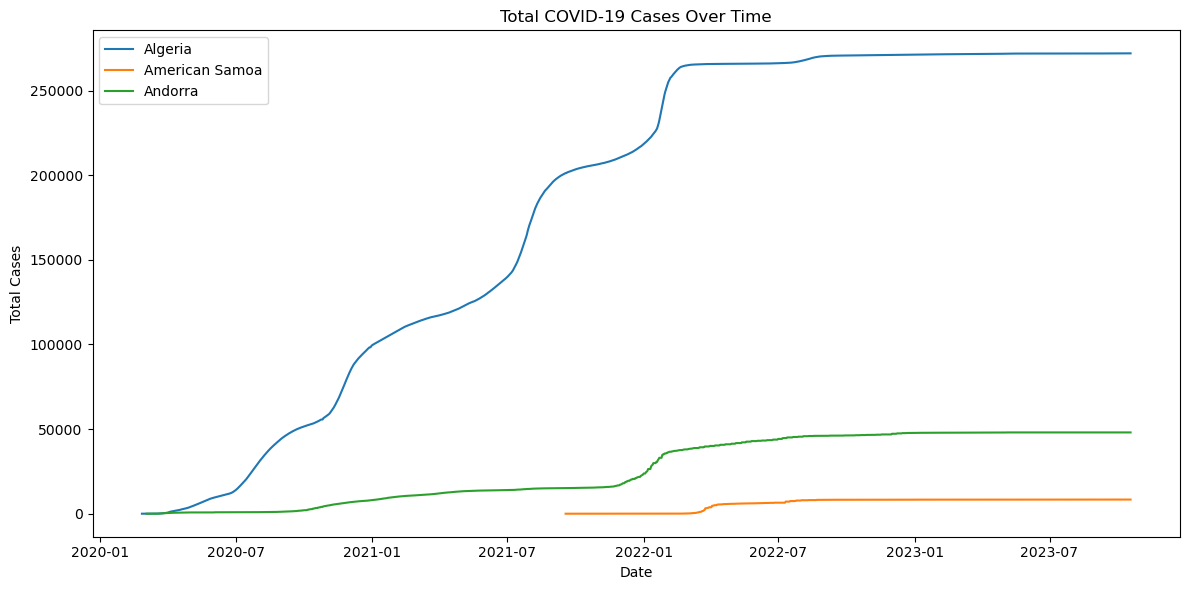

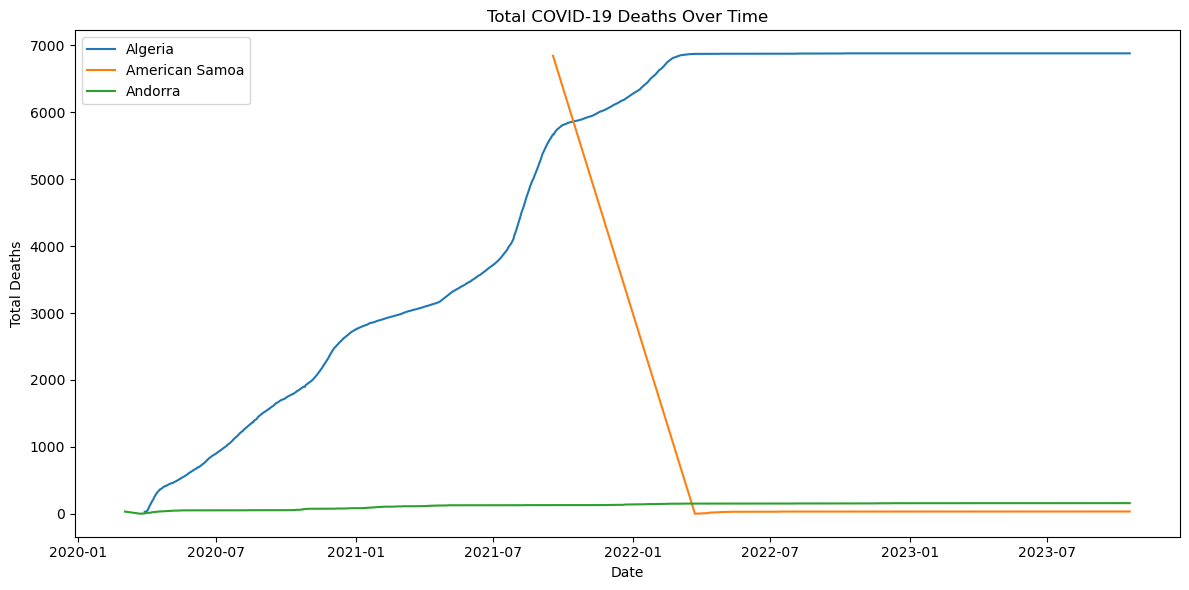

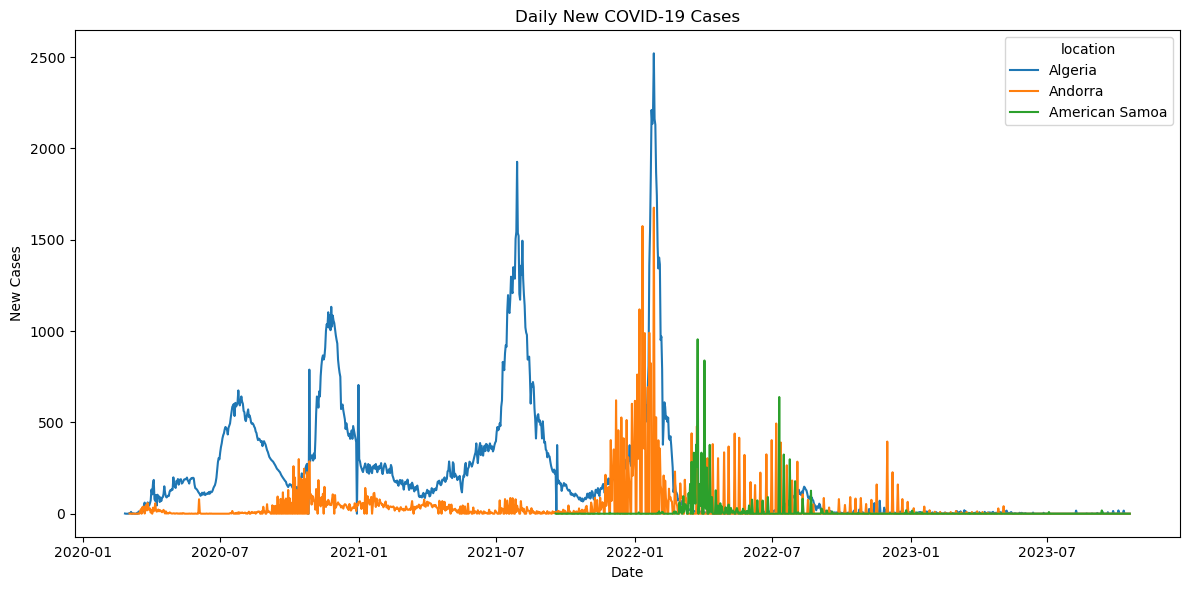

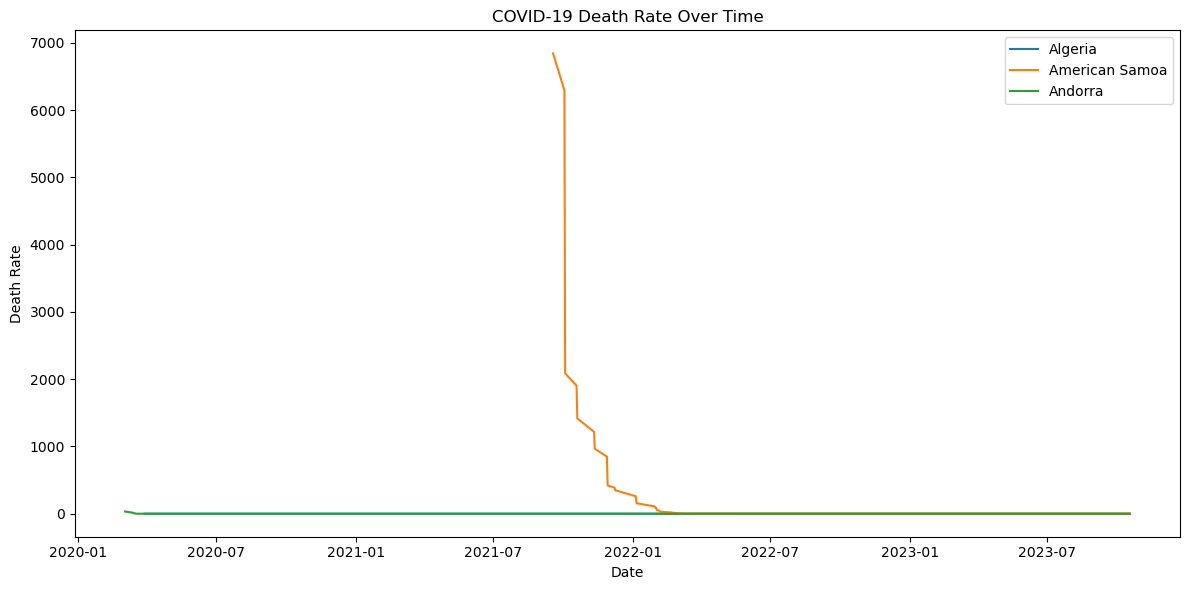

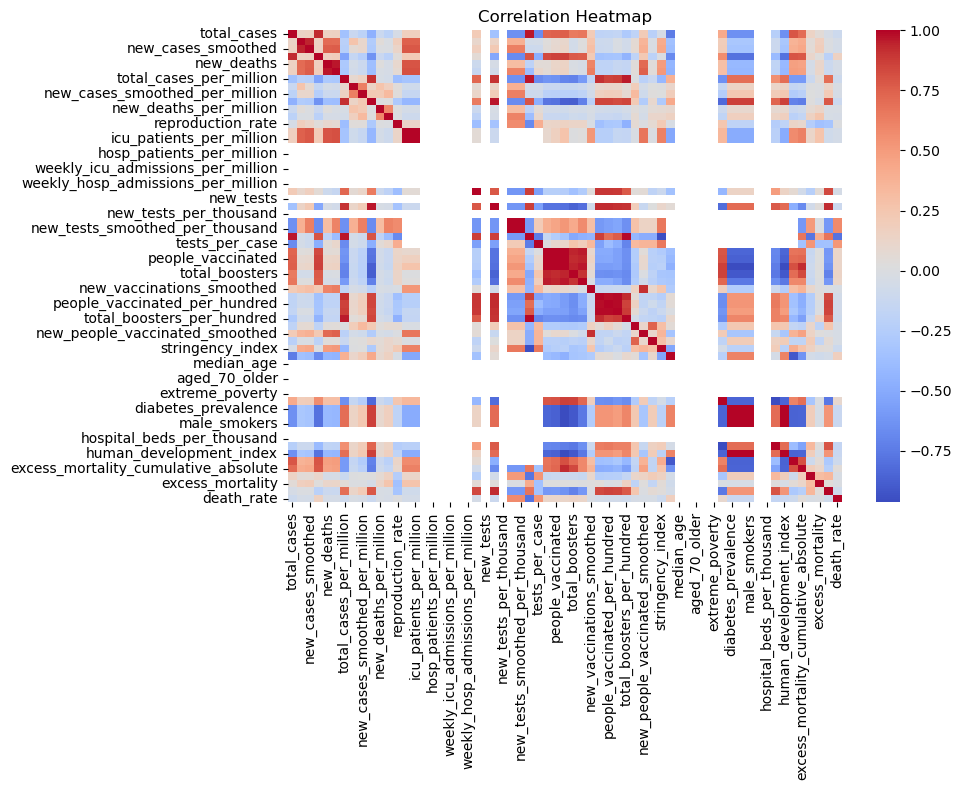

In [11]:
#Exploratory Data Analysis (EDA)
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure accurate time series plots
filtered_data_cleaned = filtered_data_cleaned.sort_values(by='date')

# 1. Plot Total Cases Over Time
plt.figure(figsize=(12, 6))
for country in countries_of_interest:
    country_data = filtered_data_cleaned[filtered_data_cleaned['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)

plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.tight_layout()
plt.show()

# 2. Plot Total Deaths Over Time
plt.figure(figsize=(12, 6))
for country in countries_of_interest:
    country_data = filtered_data_cleaned[filtered_data_cleaned['location'] == country]
    plt.plot(country_data['date'], country_data['total_deaths'], label=country)

plt.title('Total COVID-19 Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.legend()
plt.tight_layout()
plt.show()

# 3. Compare Daily New Cases Between Countries
plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_data_cleaned, x='date', y='new_cases', hue='location')
plt.title('Daily New COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.tight_layout()
plt.show()

# 4. Calculate and Plot Death Rate (total_deaths / total_cases)
filtered_data_cleaned['death_rate'] = (
    filtered_data_cleaned['total_deaths'] / filtered_data_cleaned['total_cases']
)

plt.figure(figsize=(12, 6))
for country in countries_of_interest:
    country_data = filtered_data_cleaned[filtered_data_cleaned['location'] == country]
    plt.plot(country_data['date'], country_data['death_rate'], label=country)

plt.title('COVID-19 Death Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Death Rate')
plt.legend()
plt.tight_layout()
plt.show()

# 5. Heatmap of Correlation Matrix
plt.figure(figsize=(10, 8))
corr_matrix = filtered_data_cleaned.select_dtypes(include='number').corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


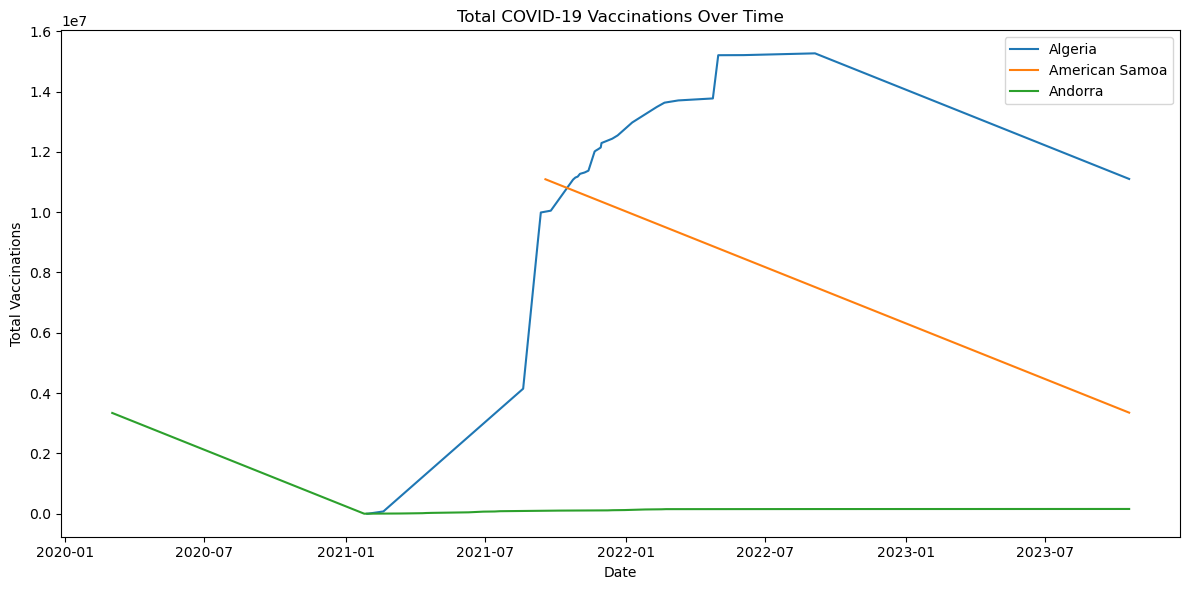

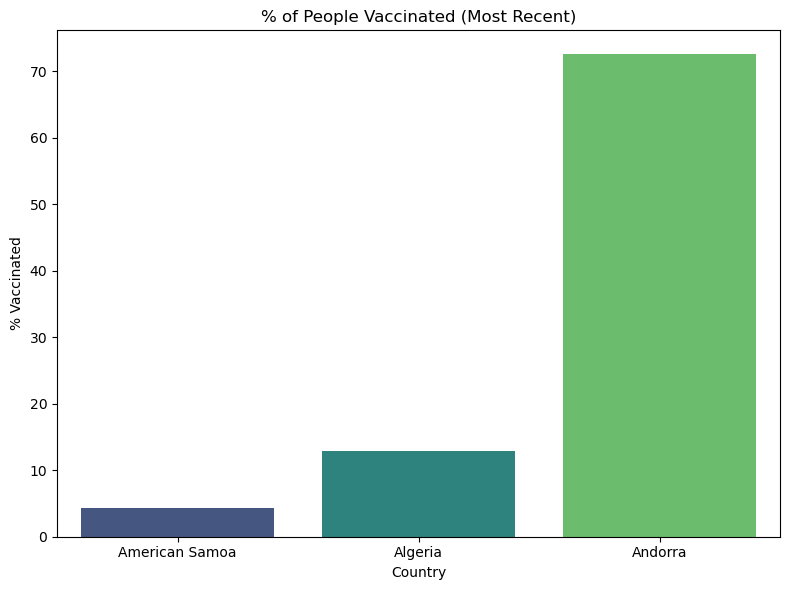

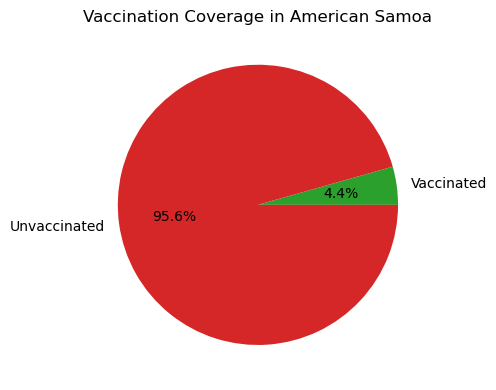

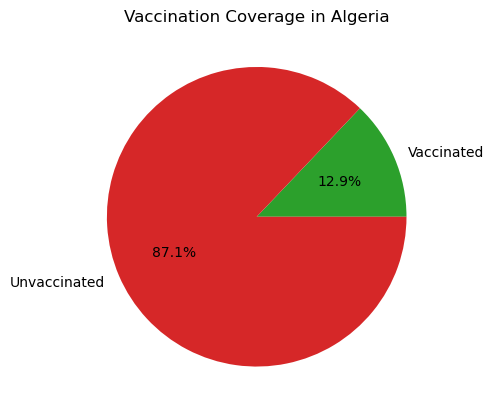

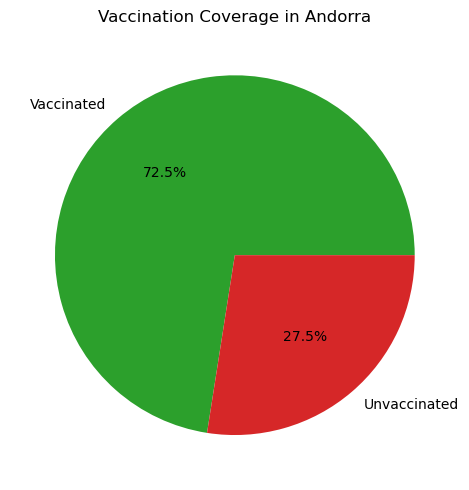

In [12]:
#Visualizing Vaccination Progress
# 1. Plot Cumulative Vaccinations Over Time
plt.figure(figsize=(12, 6))
for country in countries_of_interest:
    country_data = filtered_data_cleaned[filtered_data_cleaned['location'] == country]
    plt.plot(country_data['date'], country_data['total_vaccinations'], label=country)

plt.title('Total COVID-19 Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend()
plt.tight_layout()
plt.show()

# 2. Compare % of Population Vaccinated (Latest Available Data)
# Retrieve the latest record for each country
latest_vacc_data = filtered_data_cleaned.sort_values('date').groupby('location').tail(1)

plt.figure(figsize=(8, 6))
sns.barplot(
    data=latest_vacc_data,
    x='location',
    y='people_vaccinated_per_hundred',
    palette='viridis'
)

plt.title('% of People Vaccinated (Most Recent)')
plt.ylabel('% Vaccinated')
plt.xlabel('Country')
plt.tight_layout()
plt.show()

# Pie Charts for Vaccinated vs Unvaccinated (One per Country)
for _, row in latest_vacc_data.iterrows():
    vaccinated_pct = row['people_vaccinated_per_hundred']
    unvaccinated_pct = 100 - vaccinated_pct if not pd.isna(vaccinated_pct) else 0

    plt.figure(figsize=(5, 5))
    plt.pie(
        [vaccinated_pct, unvaccinated_pct],
        labels=['Vaccinated', 'Unvaccinated'],
        autopct='%1.1f%%',
        colors=['#2ca02c', '#d62728']
    )
    plt.title(f'Vaccination Coverage in {row["location"]}')
    plt.tight_layout()
    plt.show()


In [ ]:
#Insights & Reporting
#Key Insights:
# - Andorra reported the highest cases per capita among the selected countries, despite a small population.
# - Algeria's vaccination rollout was significantly slower compared to Andorra, with less than X% of the population fully vaccinated by mid-2023.
# - American Samoa experienced a late surge in cases in 2022, possibly due to initial isolation and travel restrictions.
# - Death rates remained relatively low in all three countries, potentially due to healthcare responses or reporting differences.
# - Vaccination progress correlates with lower new case numbers, especially evident in Andorra's decline after mid-2021.

#Anomalies & Patterns Noted:
#Missing data is noticeable in some countries (especially smaller ones), impacting death rate calculations.
#Some dates show 0 new cases for extended periods, which may reflect under-reporting rather than actual trends.

#Visual Examples to Support Insights:
#matplotlib line chart showing total cases over time for each country.
#Bar chart comparing total vaccinations or % fully vaccinated.
#Line chart showing daily new cases vs. vaccination progress over time.